In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [2]:
df = pd.read_csv("data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Understand the dataset

In [4]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Understand Target Variable Distribution

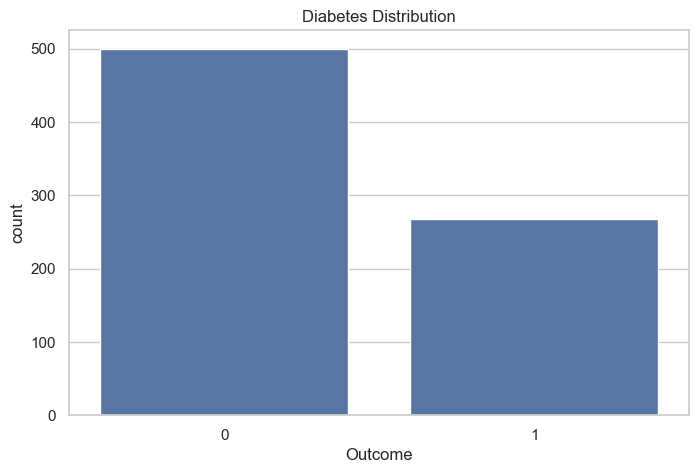

In [7]:
df["Outcome"].value_counts()
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Distribution")
plt.show()


In [8]:
#Detect Impossibble Zeros

In [9]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols:
    print(col, (df[col] == 0).sum())


Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [10]:
#Replace Medical Zeros with NaN

In [11]:
for col in cols:
    df[col] = df[col].replace(0, np.nan)

df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
#Impute Missing Values (Median Strategy)

In [13]:
df.fillna(df.median(), inplace=True)
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#Basic Clinical Insights

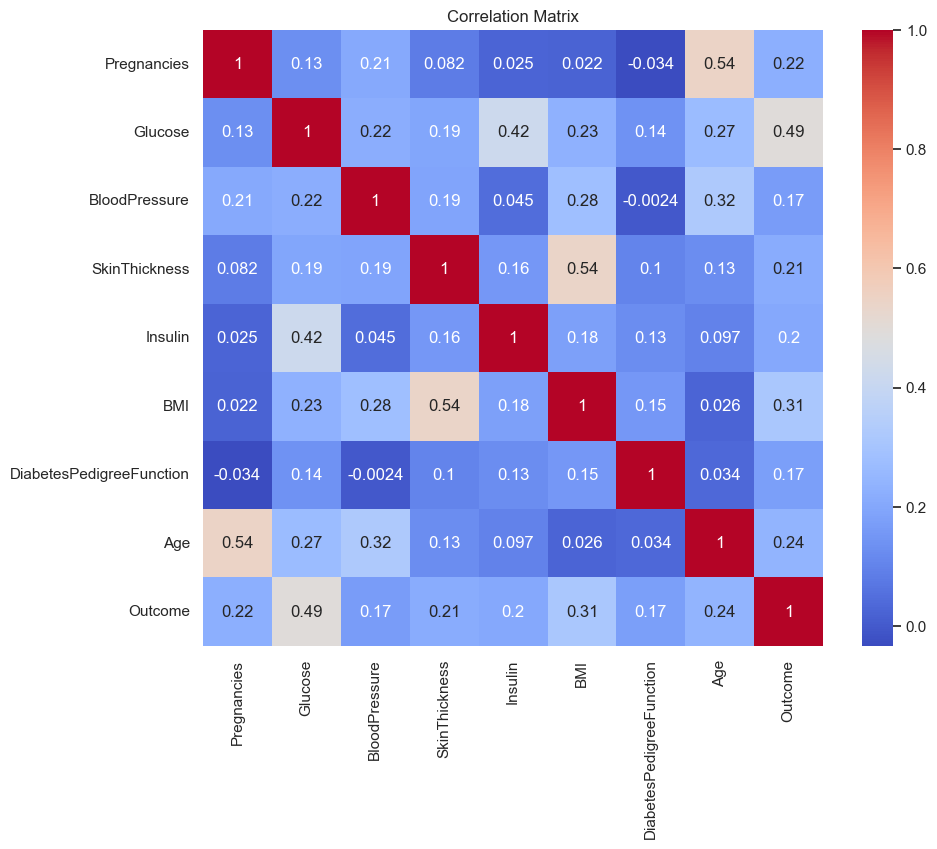

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


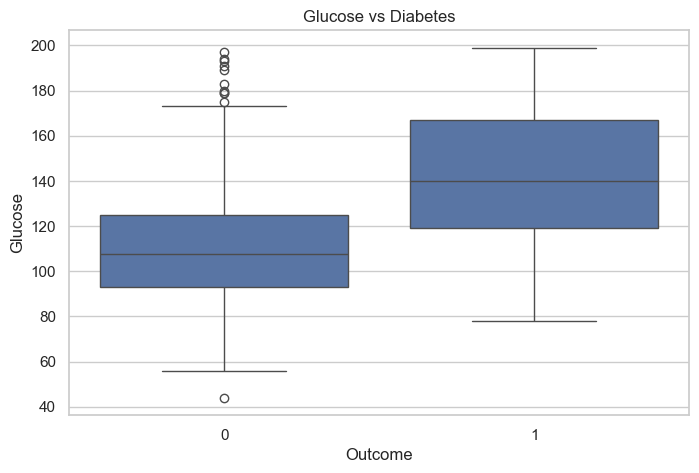

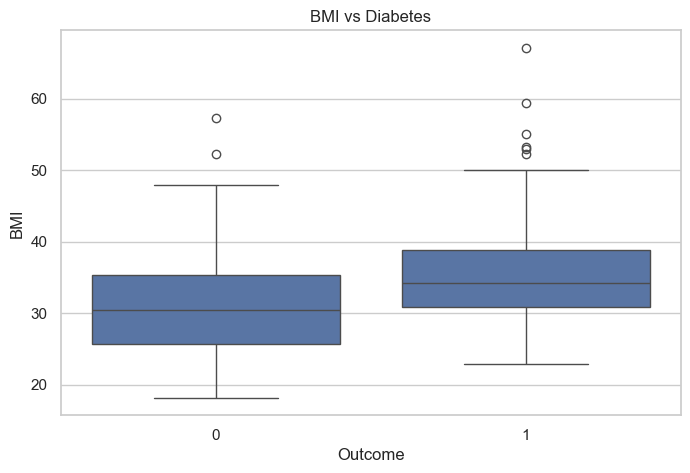

In [16]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Diabetes")
plt.show()

sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI vs Diabetes")
plt.show()


In [17]:
#PHASE 2 — Building the Risk Prediction Model

In [18]:
#Define Features and Target

In [19]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [20]:
X.head()
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]


In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[82 18]
 [27 27]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [26]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_score)


ROC-AUC: 0.812962962962963


In [27]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

importance


,feature,coefficient
1,Glucose,1.182511
5,BMI,0.688735
0,Pregnancies,0.377502
6,DiabetesPedigreeFunction,0.233386
7,Age,0.147798
3,SkinThickness,0.028225
2,BloodPressure,-0.044066
4,Insulin,-0.066157


In [28]:
import numpy as np

importance["odds_ratio"] = np.exp(importance["coefficient"])
importance


,feature,coefficient,odds_ratio
1,Glucose,1.182511,3.262558
5,BMI,0.688735,1.991194
0,Pregnancies,0.377502,1.458637
6,DiabetesPedigreeFunction,0.233386,1.262869
7,Age,0.147798,1.159279
3,SkinThickness,0.028225,1.028627
2,BloodPressure,-0.044066,0.956891
4,Insulin,-0.066157,0.935983


In [29]:
import numpy as np

new_threshold = 0.30
y_pred_adjusted = (y_prob >= new_threshold).astype(int)


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.87      0.71      0.78       100
           1       0.60      0.80      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



In [31]:
#PHASE 3 — Risk Segmentation

In [33]:
# Define features and target again
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)


C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

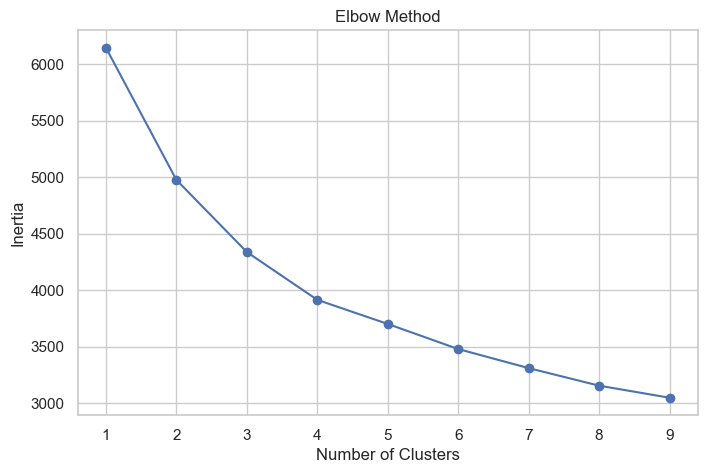

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_full)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["risk_cluster"] = kmeans.fit_predict(X_scaled_full)


C:\Users\shrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [39]:
cluster_profile = df.groupby("risk_cluster").mean()
cluster_profile


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
risk_cluster,,,,,,,,,
0,1.952941,141.376471,74.264706,36.447059,205.976471,39.224118,0.618594,29.329412,0.552941
1,7.295276,129.677165,78.476378,30.295276,136.031496,32.890157,0.454583,45.629921,0.507874
2,2.232558,105.988372,66.962209,24.604651,111.825581,28.788953,0.412140,26.026163,0.130814


In [40]:
df.groupby("risk_cluster")["Outcome"].mean()


risk_cluster
0    0.552941
1    0.507874
2    0.130814
Name: Outcome, dtype: float64

In [41]:
cluster_mapping = {
    0: "Low Risk",
    1: "Moderate Risk",
    2: "High Risk"
}

df["risk_segment"] = df["risk_cluster"].map(cluster_mapping)


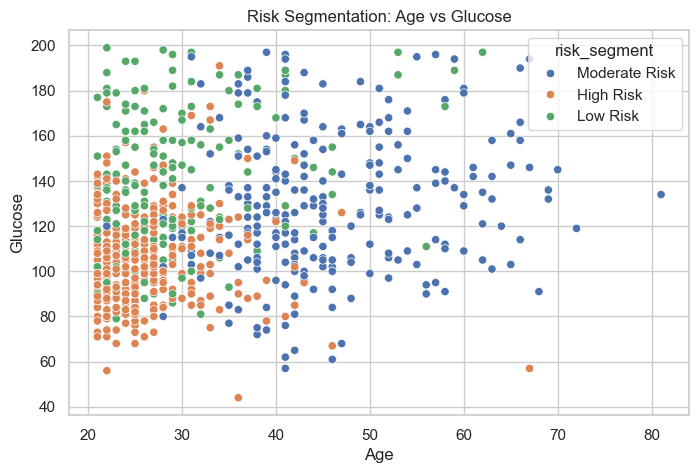

In [43]:
import seaborn as sns

sns.scatterplot(
    x="Age",
    y="Glucose",
    hue="risk_segment",
    data=df
)
plt.title("Risk Segmentation: Age vs Glucose")
plt.show()


In [45]:
cluster_profile = df.groupby("risk_cluster").mean(numeric_only=True)
cluster_profile


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
risk_cluster,,,,,,,,,
0,1.952941,141.376471,74.264706,36.447059,205.976471,39.224118,0.618594,29.329412,0.552941
1,7.295276,129.677165,78.476378,30.295276,136.031496,32.890157,0.454583,45.629921,0.507874
2,2.232558,105.988372,66.962209,24.604651,111.825581,28.788953,0.412140,26.026163,0.130814


In [46]:
df.groupby("risk_cluster")["Outcome"].mean()


risk_cluster
0    0.552941
1    0.507874
2    0.130814
Name: Outcome, dtype: float64

In [49]:
cluster_profile["Glucose"]


risk_cluster
0    141.376471
1    129.677165
2    105.988372
Name: Glucose, dtype: float64

In [50]:
cluster_profile[["BMI", "Age", "Insulin", "Pregnancies"]]


,BMI,Age,Insulin,Pregnancies
risk_cluster,,,,
0,39.224118,29.329412,205.976471,1.952941
1,32.890157,45.629921,136.031496,7.295276
2,28.788953,26.026163,111.825581,2.232558


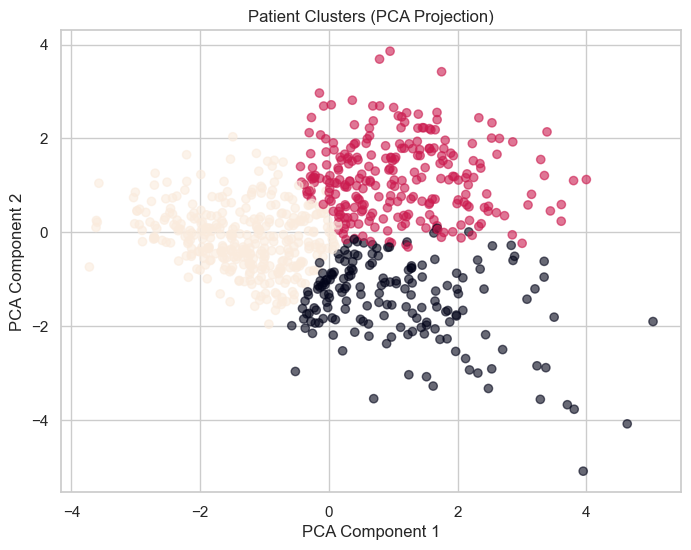

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["risk_cluster"], alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Patient Clusters (PCA Projection)")
plt.show()


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_full, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [55]:
import pandas as pd

importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False)


Glucose                     1.114496
BMI                         0.683509
Age                         0.401210
Pregnancies                 0.226785
DiabetesPedigreeFunction    0.200471
SkinThickness               0.071687
Insulin                    -0.135922
BloodPressure              -0.151407
dtype: float64